# Exam 2, Portion 2 - Samuel Moreno

#### (5 points): If you are not familiar with this kind of scenario, but you were hired for this job in the real world, you would need to learn about it. Find two resources on the internet that are reliable and of good research quality (no forums, blogs, videos, social media, etc...)

Source 1: https://pmc.ncbi.nlm.nih.gov/articles/PMC4953449/

Key takeaways: Readmitted patientss are older on average, initial stay was longer for readmitted patient, an overwhelming majority of readmitted patients could have been avoided, readmission without conclusive therapy was the leading cause for readmission.

Source 2: https://pmc.ncbi.nlm.nih.gov/articles/PMC4953449/

Key takeaways: Around 20% of medicare beneficieares experience readmission within 30 days. Hospitals have been taken preventive measures to try to avoid readmissions being as frequent, and have reduced the percentage by about 5% over the years. 

"The most common preventable factors were emergency department decision-making regarding readmission, failure to relay important information to outpatient providers, discharge of patients too soon, and lack of goals of care discussions among patients with serious illnesses. "

#### (5 points): Download this dataset and assess it using ISLP 3.3 and 3.4 (like how you did for homework 3).

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

hospital = pd.read_csv("FY_2025_Hospital_Readmissions_Reduction_Program_Hospital.csv")

hospital.describe()
#hospital.columns

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
count,18510.000000,8340.000000,6583.000000,11927.000000,11927.000000,11927.000000
mean,261770.055105,279.269904,3.187756,1.001719,14.995386,14.961234
std,164647.739172,266.018069,2.089167,0.080547,5.017854,4.871997
min,10001.000000,0.000000,1.000000,0.477900,1.674200,2.892100
25%,110073.000000,115.000000,1.000000,0.956550,12.533000,12.612800
50%,250048.000000,197.000000,5.000000,0.998200,16.060200,16.146000
75%,390133.000000,354.000000,5.000000,1.043000,18.609000,18.667350
max,670327.000000,4501.000000,7.000000,1.643000,27.809500,25.394200


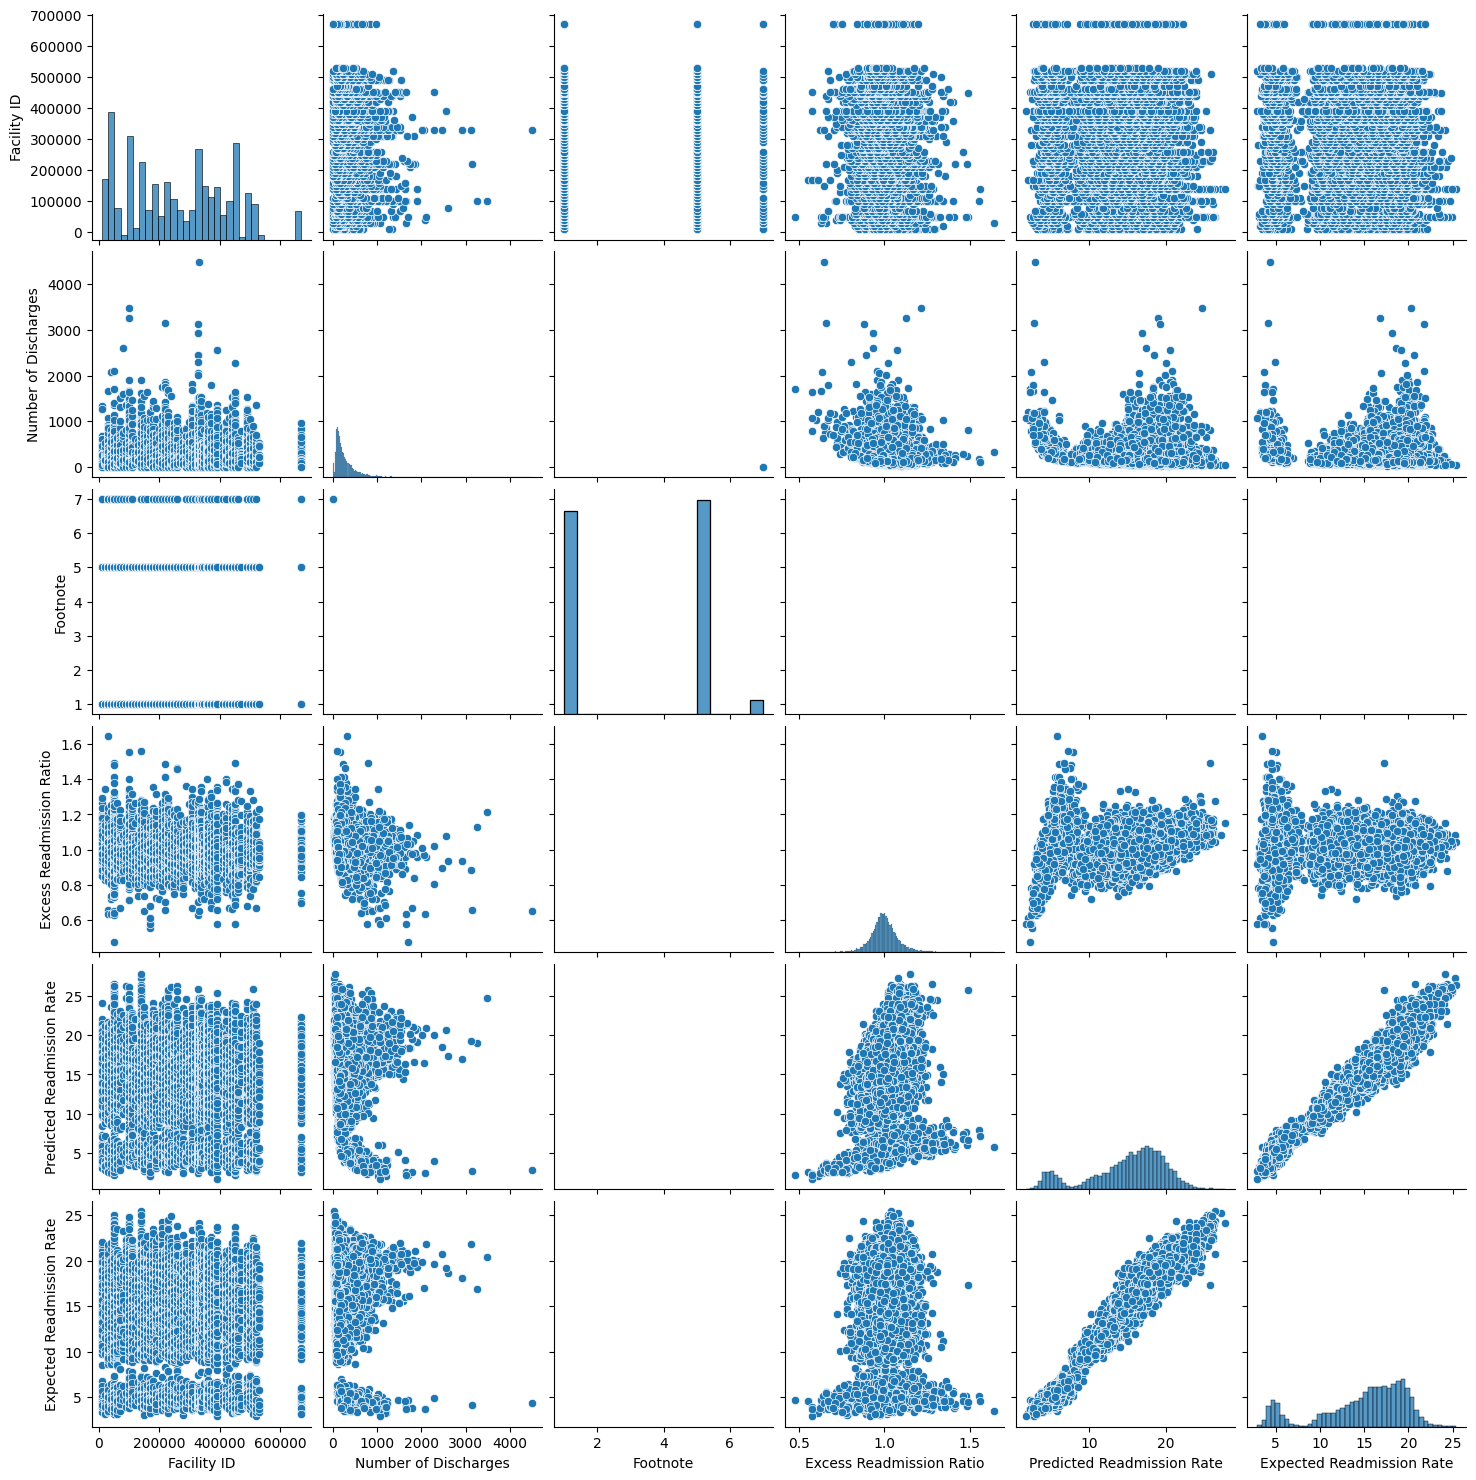

In [318]:
# Stole this from my HW 3
sns.pairplot(hospital)
plt.show()

In [319]:
# Noticed footnote so I wanna check for nulls (stole from HW 3 as well)
print(hospital.isnull().sum()) 

Facility Name                     0
Facility ID                       0
State                             0
Measure Name                      0
Number of Discharges          10170
Footnote                      11927
Excess Readmission Ratio       6583
Predicted Readmission Rate     6583
Expected Readmission Rate      6583
Number of Readmissions         6583
Start Date                        0
End Date                          0
dtype: int64


In [320]:
print(f'Total Columns: {len(hospital)}')
print (hospital["Footnote"].isnull().sum() + hospital["Excess Readmission Ratio"].isnull().sum())
# So Footnote and excess Readmission Ratio, Predicted Readmission Rate, Expected Readmission Rate, and Number of Readmissions are mutually exclusive.

Total Columns: 18510
18510


#### (5 points): Describe each of the 12 variables in your own words, then mention the datatype of each.

 

In [321]:
hospital.dtypes

Facility Name                  object
Facility ID                     int64
State                          object
Measure Name                   object
Number of Discharges          float64
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions         object
Start Date                     object
End Date                       object
dtype: object

##### The 12 columns, what they are, and their data types are as follow:
1. Facility Name, the name of the hospital this patient was under study for, this is an object type (category since its just a string).
2. Facility ID is the ID of the hospital encoded to its name, the dtype is int64 but it should probably be treated as a categorical variable as well.
3. State; the state the hospital is in; object since its 2 letters.
4. Measure Name; I think this is the condition the data pertains to?; object since its strings.
5. Number of Discharges; # of discharges for the measure/condition; float64 since its a number.
6. Footnote; I think this is a reason for not including any of the following 4 columns; float64 since its a number. 
7. Excess Readmission Ratio; a ratio of expected readmissions > 1 is more than expected and vice versa for the condition, float64 since its a number.
8. Predicted Readmission Rate; predicted readmissions for the condition * the readmission rate for patient/condition. float64 since num.
9. Expected Readmission Rate; this is like the national avg for the condition or patient or smth like that. float64 since num.
10. Number of Readmissions; the num of readmissions for that condition, object since a lot of data points are "Too Few to Report"
11. Start Date; beginning of data collection, object since its structured date format.
12. End Date; end of data collection, object since its structured date format.

#### (5 points): Form your research question that can be answered by this dataset.
What factors impact the number of readmissions the most?
By extension: Which and how can these factors be manipulated to reduce the number of reradmissions.

#### (5 points): Explain why your research question would be interesting to the board-- do not tailor your research question to me just because I'm your machine learning instructor. I'm interested in your model, but the board cares about money/patients

The board most likely cares about saving money more than anything else, so if I taylor my question to help answer how to reduce readmissions this would be enticing for them. 

#### (40 points): Choose any algorithm from chapter 5, 6, 7, or 8 to answer your research question. Explain your choice.
    Write your algorithm from scratch.
    Include resources used for writing your algorithm. 
    If you choose to use generative AI-- and the gen AI model gets something wrong -- you will be docked for its mistakes. A mistake can include, but is not limited to: code mistakes, getting the right answer for the wrong reason, using a model for the wrong datatypes, ethical violations and assumptions made by the model, etc... 

A: I am going to be doing a stepwise forward selection to predict the number of readmissions for my model. This will kind of know out the bad features and also give coefficients for the more important features.

Here are my sources:

https://automaticaddison.com/stepwise-forward-selection-algorithm-from-scratch/

https://fakhredin.medium.com/forward-selection-to-find-predictive-variables-with-python-code-3c33f0db2393

https://en.wikipedia.org/wiki/Coefficient_of_determination

In [322]:
# First I wanna clean up my dataset (drop footnote first)
hospital.drop(['Footnote'], axis=1, inplace=True)  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
hospital.dropna(subset = ['Number of Readmissions'], inplace=True) # https://www.statology.org/pandas-dropna-specific-column/
# I think I have enough data to drop na num of discharges:
hospital.dropna(subset = ['Number of Discharges'], inplace=True) # https://www.statology.org/pandas-dropna-specific-column/
print(hospital.isnull().sum()) 

Facility Name                 0
Facility ID                   0
State                         0
Measure Name                  0
Number of Discharges          0
Excess Readmission Ratio      0
Predicted Readmission Rate    0
Expected Readmission Rate     0
Number of Readmissions        0
Start Date                    0
End Date                      0
dtype: int64


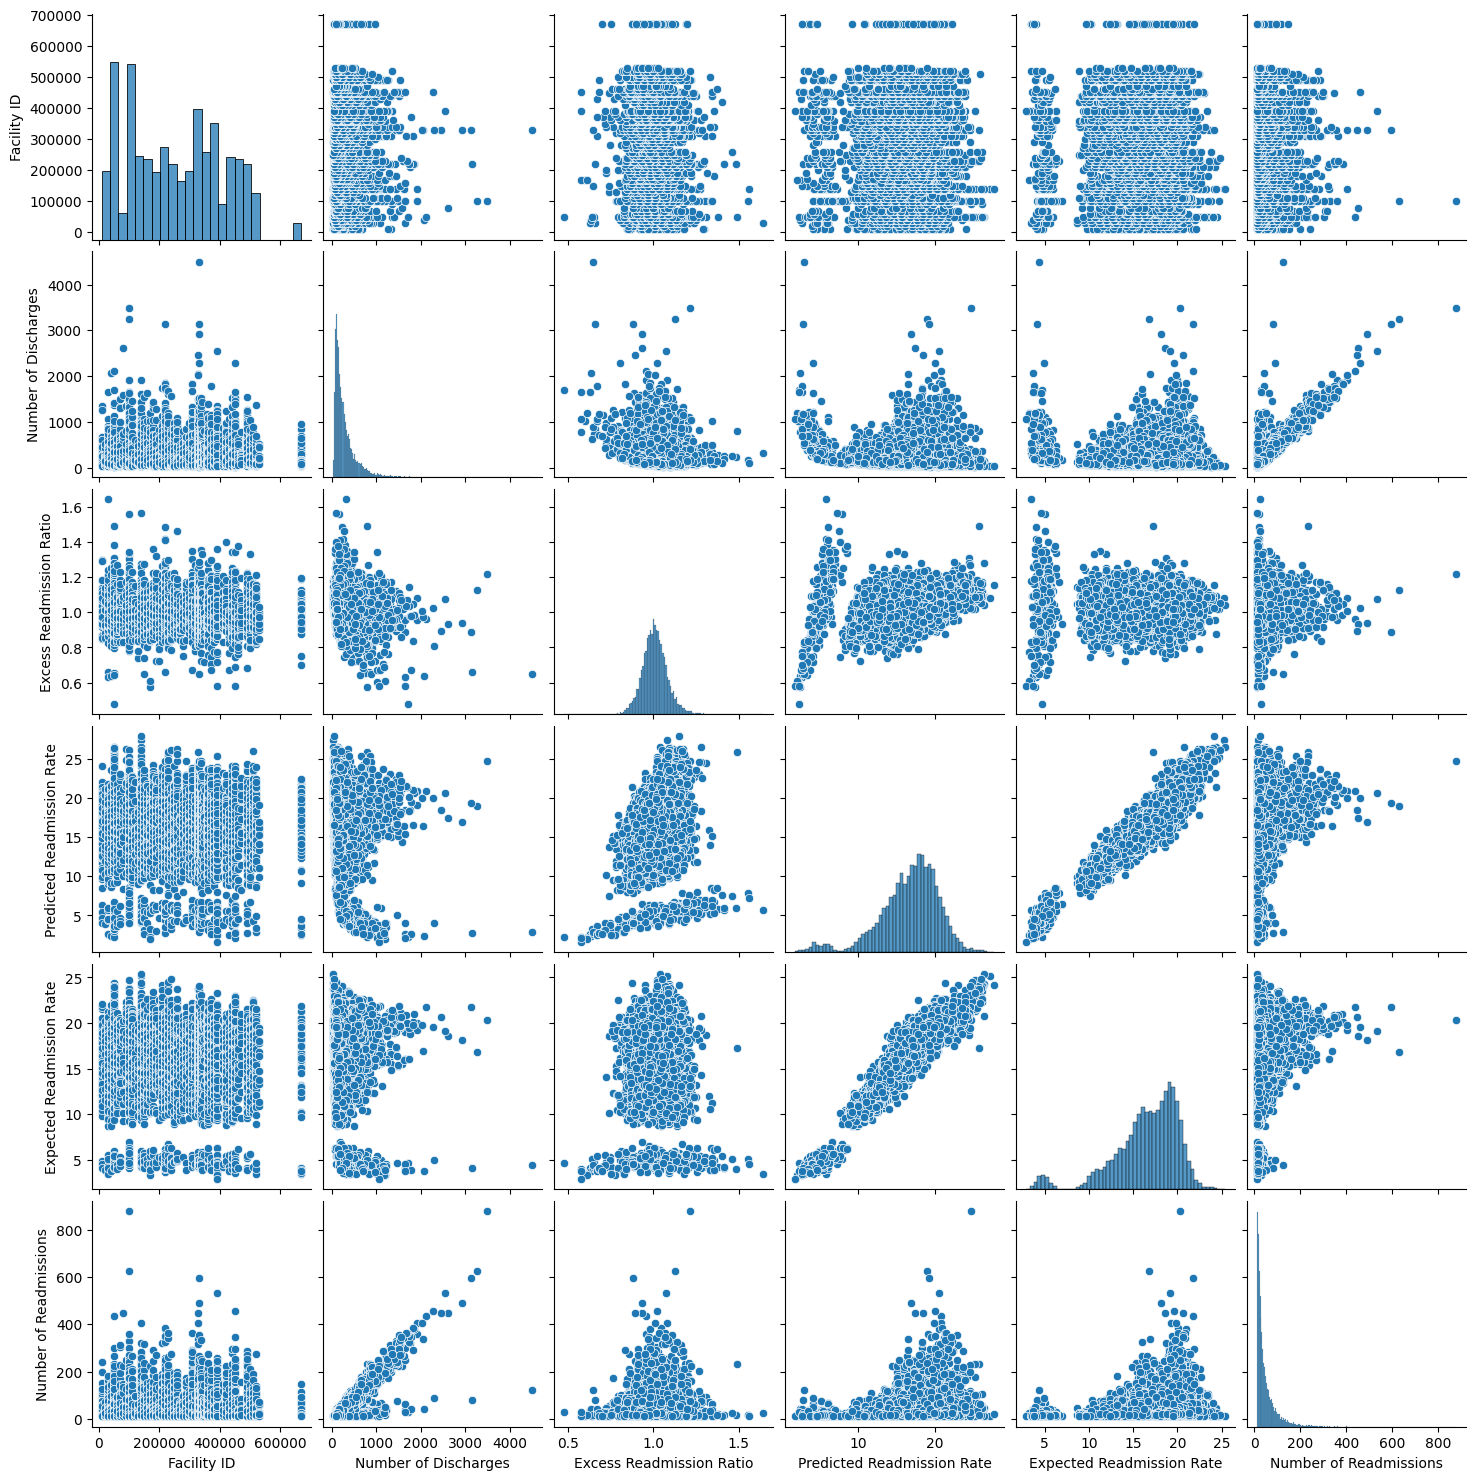

In [323]:
hospital.dtypes
hospital["Number of Readmissions"] = hospital["Number of Readmissions"].replace("Too Few to Report", 0) # https://stackoverflow.com/questions/27060098/replacing-few-values-in-a-pandas-dataframe-column-with-another-value
hospital["Number of Readmissions"] = pd.to_numeric(hospital["Number of Readmissions"], errors='coerce') #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html

# I basically turned the readmissions that are too few into 0 so I can include them
sns.pairplot(hospital)
plt.show()

In [324]:
# My code for linear reg from hw 3: (I had to add the r_squared feature to work with the code from medium)
class MyLinearReg():
    # Here I am creating a constructor for my class
    def __init__(self, learning_rate, it):
        self.learning_rate = learning_rate # This if for gradient descent
        self.it = it # This is for gradient decent
        
    # This trains the model
    def fit(self, X, Y):
        # Initializing X and Y
        X = np.array(X)
        Y = np.array(Y)
        
        # n is the number of features (2)
        self.m, self.n = X.shape 
        
        # Initializing my weight
        self.B = np.zeros(self.n) # Modified this to allow for more B
        self.b_0 = 0
        self.X = X
        self.Y = Y
        
        # This is the gradient decent
        for i in range(self.it):
            self.update_weights()
        return self
    
    # This is the implementation of gradient decent formula
    def update_weights(self):
        Y_pred = self.predict(self.X)
        dB = -(2 * (self.X.T).dot(self.Y - Y_pred)) / self.m
        db_0 = -2 * np.sum(self.Y - Y_pred) / self.m
        
        # Here the weight is adjusted according to the learning rate.
        self.B = self.B - self.learning_rate * dB
        self.b_0 = self.b_0 - self.learning_rate * db_0
        
        return self
    
    def predict(self, X):
        return X.dot(self.B) + self.b_0 
    
    def describe(self):
        print("The values of B is:", self.B)
        print("The value of B_0 is: ", self.b_0)
        
    # I had to add this for the forward stepwise, i just used the r^2 formula we have covered in book/class
    # also used this for formula: https://en.wikipedia.org/wiki/Coefficient_of_determination
    def r_squared(self):
        y_pred = self.predict(self.X)
        ss_res = np.sum((self.Y - y_pred) ** 2)
        ss_tot = np.sum((self.Y - np.mean(self.Y)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2

In [325]:
# need to drop all non-numeric
print(hospital.dtypes)
hospital.drop(['Facility Name', 'Facility ID', 'Facility Name', 'State', 'Start Date', 'End Date', 'Measure Name'], axis=1, inplace=True)  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

Facility Name                  object
Facility ID                     int64
State                          object
Measure Name                   object
Number of Discharges          float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions          int64
Start Date                     object
End Date                       object
dtype: object


In [326]:
# I want to use measure name still so Ill encode it
# SRC: https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
# encoded = pd.get_dummies(hospital['Measure Name'], prefix='Measure').astype(int)
# hospital = pd.concat([hospital.drop('Measure Name', axis=1), encoded], axis=1)
print(hospital.dtypes)

### NOTE: nevermind, it broke my code

Number of Discharges          float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions          int64
dtype: object


In [ ]:
# Actual algorithm start: Everything is breaking for some reason :(
ar2 = dict()
candidates = []
last_max = -1

y = 'Number of Readmissions'

print(hospital)

while(True):
    for x in hospital.drop([y] + candidates, axis=1).columns:
        if len(candidates) == 0:
            features = [x]
        else:
            features = [x] + candidates

        model = MyLinearReg(it=10000, learning_rate=0.0001)
        model.fit(hospital[features], hospital[y])
        ar2[x] = model.r_squared()

    max_ar2 =  max(ar2.values())
    max_ar2_key = max(ar2, key=ar2.get)

    if max_ar2 > last_max:
        candidates.append(max_ar2_key)
        last_max = max_ar2

        print('step: ' + str(len(candidates)))
        print(candidates)
        print('Adjusted R2: ' + str(max_ar2))
        print('===============')
    else:
        print(model.describe())
        break

       Number of Discharges  Excess Readmission Ratio  \
0                     296.0                    0.9483   
1                     151.0                    0.9509   
2                     681.0                    1.0597   
4                     490.0                    0.9715   
5                     130.0                    0.9330   
...                     ...                       ...   
18356                 656.0                    1.0197   
18357                 120.0                    1.0179   
18358                 100.0                    1.1076   
18359                 136.0                    0.9751   
18422                  87.0                    0.9441   

       Predicted Readmission Rate  Expected Readmission Rate  \
0                         13.0146                    13.7235   
1                          9.6899                    10.1898   
2                         21.5645                    20.3495   
4                         16.1137                    16.586

/tmp/ipykernel_7314/3866293953.py:35: RuntimeWarning: invalid value encountered in subtract
  self.B = self.B - self.learning_rate * dB


The values of B is: [3.01159162]
The value of B_0 is:  -1.1407571013646145
None


In [ ]:
# Fitting model with the Expected Readmission Rate:
X = hospital[['Expected Readmission Rate']]
Y = hospital['Number of Readmissions']

model = MyLinearReg(learning_rate=0.001, it=10000)

model.fit(X, Y)

model.describe()

The values of B is: [3.45113743]
The value of B_0 is:  -8.768950050992855


#### (15 points): You need to validate your algorithm! If you want to use a package for this, that is okay.



In [334]:
from sklearn.linear_model import LinearRegression

model_sklearn = LinearRegression()
model_sklearn.fit(X, Y)

print("sklearn coefficient (B):", model_sklearn.coef_)
print("sklearn intercept (B_0):", model_sklearn.intercept_)

sklearn coefficient (B): [3.78795377]
sklearn intercept (B_0): -14.614302158693043


As shown, the coefficient of my models are pretty similar:

My model:
The values of B is: [3.45113743]
The value of B_0 is:  -8.768950050992855

SKLearn:
sklearn coefficient (B): [3.78795377]
sklearn intercept (B_0): -14.614302158693043

so I think my model is good enough.

#### (15 points): Create a repository on your personal GitHub site.
    Send me the link and be sure I have access. When I receive your email and link, I will verify that I can see your repository and email you back.
    Include a Readme file that contains the information from steps 2, 3, 4, 5, 6, 7, and 8. (Steps that include code just need a description).
    Submit your code files and name them in this format:
        "step_3_assessment.py"
        "step_6_chosen-algo.py"
        "step_7_chosen-validation.py" (if you wanted this separate; some may choose to keep the algorithm and validation in the same file).
    Include disclosures in your readme file including but not limited to: ethics statements, limitations, generative AI use, and references used.
    Include instructions for me so I can run your model.
    You must have at least three significant changes in your code, visible via pushing your code. Failure to show these changes may earn you a lower grade. I need to see your thought process as well as your final result.

> Done

#### (5 points): In a few sentences, tell the board your conclusions, predictions, and recommendations.

In conclusion, there is not really a definitive conclusion as to what leads to re-admissions based on this model. As such, I would suggest to gather more data to ensure that conclusive predictions can be made.